https://www.youtube.com/watch?v=TuTmC8aOQJE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations, product

rc('animation', html='jshtml')

## Stochastic processes

**Definition:** It is a collection of random variables indexed by time.

or

**Definition:** It is a probability distribution over a space of path (This is more helpful in further discussion).

There are two types of stochastic processes: i) continuous ii) discrete

We will focus on discrete stochastic processes here.

Let's see some trivial examples in the context of forecasting where we have all the information about the past and we like to predict in present or future.

First example is,

$$
f(t) = t \tag{1}
$$

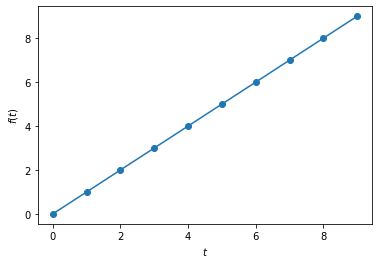

In [2]:
t = 10
f = lambda t: np.arange(t)
plt.plot(np.arange(t), f(t), 'o-');
plt.xlabel('$t$');plt.ylabel('$f(t)$');

No randomness here. We are 100% certain about value of $f(t)$ at time $t$. Now, another example is,
\begin{aligned}
f(t) &= t, \forall t, \;\;\;\;\;\; proba=\frac{1}{2}\\
     &= -t, \forall t, \;\;\;\;\;\; proba=\frac{1}{2}
\end{aligned}

In [3]:
f_possible1 = lambda t: np.arange(t)
f_possible2 = lambda t: -np.arange(t)
f = lambda t: np.arange(t) if np.random.uniform(0,1)>0.5 else -np.arange(t)

rc('font',size=14)
fig, ax = plt.subplots()
def frame(_):
    ax.cla()
    ax.plot(np.arange(t), f_possible1(t), label='possible path #1', linewidth=15, alpha=0.4)
    ax.plot(np.arange(t), f_possible2(t), label='possible path #2', linewidth=15, alpha=0.4)
    ax.plot(np.arange(t), f(t), 'o-', label='chosen path');
    ax.set_xlabel('$t$');ax.set_ylabel('$f(t)$');
    ax.legend()
plt.close()
anim = FuncAnimation(fig, frame, frames=range(10))
anim

There is a randomness in this stochastic process but once the path is chosen, it becomes certain. In other words, given any $f(t),t>0$, we can know the value of $f(t')$. Now, yet another example,
\begin{aligned}
\text{for each } t,
f(t) &= t, \;\;\;\;\;\; proba=\frac{1}{2}\\
     &= -t, \;\;\;\;\;\; proba=\frac{1}{2}
\end{aligned}

In [4]:
f_possible1 = lambda t: np.arange(t)
f_possible2 = lambda t: -np.arange(t)
f_possible3 = lambda t: [i if i%2 else -i for i in range(t)]
f_possible4 = lambda t: [-i if i%2 else i for i in range(t)]
f = lambda t: [np.random.choice([-i,i],p=[0.5,0.5]) for i in range(t)]

rc('font',size=14)
fig, ax = plt.subplots()
def frame(_):
    ax.cla()
    alpha = 0.2
    ax.plot(np.arange(t), f_possible1(t), label='possible paths', linewidth=15, alpha=alpha,color='b')
    ax.plot(np.arange(t), f_possible2(t), linewidth=15, alpha=alpha,color='b')
    ax.plot(np.arange(t), f_possible3(t), linewidth=15, alpha=alpha,color='b')
    ax.plot(np.arange(t), f_possible4(t), linewidth=15, alpha=alpha,color='b')
    ax.plot(np.arange(t), f(t), 'o-', label='chosen path',color='k');
    ax.set_xlabel('$t$');ax.set_ylabel('$f(t)$');
    ax.legend()
plt.close()
anim = FuncAnimation(fig, frame, frames=range(10))
anim

This stochastic process is truly random, in the sense, given all the values from $f(0)$ to $f(t-1)$ we can not be certain about $f(t)$.

In the study of stochastic processes, we are interested in three questions,

1. Given the past information, can we predict the future?
1. What is the long term behaviour of a sequence after observing many time-stamps?
1. How often boundary events (extreme events) happen? (example, stock price too high, too low)

Now, let us see the fundamental stochastic process : a simple(1D) random walk

### Simple random walk

if $y_i$ take value 1 or -1 with equal probability then simple random walk at time $t$ is, $f(t) = \sum\limits_{0}^{t}y_i(t)$.

In [5]:
f_upper = lambda t: np.arange(t)
f_lower = lambda t: -np.arange(t)
f = lambda t: [0]+np.cumsum(np.random.choice([1,-1],p=[0.5,0.5], size=t-1)).tolist()

rc('font',size=14)
fig, ax = plt.subplots()

def frame(_):
    ax.cla()
    alpha = 0.2
    ax.plot(np.arange(t), f_upper(t), label='extreme lines', linewidth=15, alpha=alpha,color='b')
    ax.plot(np.arange(t), f_lower(t), linewidth=15, alpha=alpha,color='b')
    ax.plot(np.arange(t), f(t), 'o-', label='chosen path',color='k');
    ax.set_xlabel('$t$');ax.set_ylabel('$f(t)$');
    ax.legend()
plt.close()
anim = FuncAnimation(fig, frame, frames=range(t))
anim

Let's check for expected value and variance of $f(t)$

\begin{aligned}
f(t) &= f(t-1) + I, \text{   where, } I \text{ takes value 1 or -1 with equal probability}\\
\mathbb{E}(f(t)) &= \mathbb{E}(f(t-1)) + \mathbb{E}(I)\\
                 &= \sum\limits_{time=0}^{t}\mathbb{E}(I)\\
\mathbb{E}(f(t)) &= 0
\end{aligned}

And, variance
\begin{aligned}
V(f(t)) &= \sum\limits_{T=0}^{t}V(I)\\
        &= \sum\limits_{T=0}^{t}(\mathbb{E}(I^2) - (\mathbb{E}(I))^2\\
        &= \sum\limits_{T=0}^{t}\mathbb{E}(I^2)\\
        &= \sum\limits_{T=0}^{t}(0.5\times(1)^2+0.5\times(-1)^2)\\
        &= \sum\limits_{T=0}^{t}1\\
V(f(t)) &= t
\end{aligned}

So, standard deviation would be $\sqrt{t}$. Let us emprirically verify if this is the case.

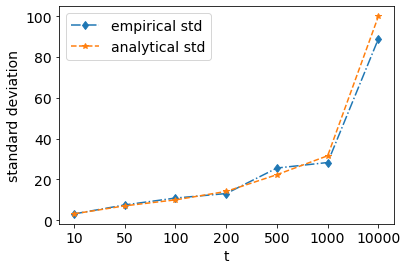

In [6]:
def empirical_std(t):
    return np.std([f(t)[-1] for _ in range(100)])

test_ind = [10,50,100,200,500,1000,10000]
emp_std = [empirical_std(i) for i in test_ind]
analytic_std = np.sqrt(test_ind)

plt.plot(emp_std, 'd-.', label='empirical std')
plt.plot(analytic_std, '*--',label='analytical std')
plt.xticks(range(len(test_ind)), test_ind)
plt.legend();
plt.xlabel('t');plt.ylabel('standard deviation');

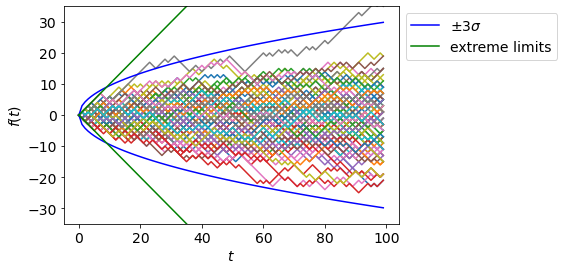

In [7]:
t = 100
for _ in range(100):
    f_t = f(t)
    plt.plot(f_t);
plt.plot(3*np.sqrt(range(t)),color='b',label='$\pm 3 \sigma$');
plt.plot(-3*np.sqrt(range(t)),color='b');
plt.plot(np.arange(t),color='g',label='extreme limits');
plt.plot(-np.arange(t),color='g');
plt.xlabel('$t$');plt.ylabel('$f(t)$')
plt.ylim(-35,35)
plt.legend(bbox_to_anchor=[1,1]);

### Random walk and Gaussian distribution

Interesting fact about a simple random walk is the following,
$$
\text{for }t \to \infty, \frac{1}{\sqrt{t}}f(t) \sim \mathcal{N}(0,1)
$$

Let us verify this by fitting various distributions to the data.

In [8]:
!pip install -qq distfit
from distfit import distfit

t = 100000
N = 10000
samples = (1/np.sqrt(t))*np.array([f(t)[-1] for _ in range(N)])
dist = distfit(alpha=0.05)

print('theoretical standard deviation =',np.sqrt(t).round(2))
# Search for best theoretical fit on your empirical data
dist.fit_transform(samples)['summary'];

theoretical standard deviation = 316.23
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0087752] [loc=-0.011 scale=0.997]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.3942591] [loc=-4.279 scale=4.268]
[distfit] >[pareto    ] [0.32 sec] [RSS: 1.5405034] [loc=-7.990 scale=3.712]
[distfit] >[dweibull  ] [0.16 sec] [RSS: 0.0200055] [loc=-0.013 scale=0.855]
[distfit] >[t         ] [0.24 sec] [RSS: 0.0087749] [loc=-0.011 scale=0.997]
[distfit] >[genextreme] [0.25 sec] [RSS: 0.0113442] [loc=-0.384 scale=0.989]
[distfit] >[gamma     ] [0.24 sec] [RSS: 0.0084606] [loc=-63.983 scale=0.016]
[distfit] >[lognorm   ] [0.62 sec] [RSS: 0.0084220] [loc=-75.187 scale=75.171]
[distfit] >[beta      ] [0.63 sec] [RSS: 0.0084498] [loc=-20.995 scale=51.997]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.9922040] [loc=-4.279 scale=7.906]
[distfit] >Compute confidence interval [parametric]


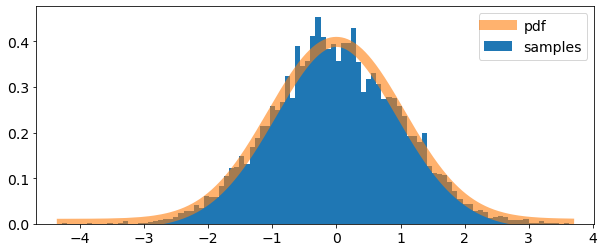

In [9]:
from scipy.stats import norm
samples = np.sort(samples, axis=0) 

plt.figure(figsize=(10,4))
plt.hist(samples, bins=100, density=True,label='samples');
plt.plot(samples, norm.pdf(samples), linewidth=10, alpha=0.6, label='pdf');
plt.legend(bbox_to_anchor=(1,1));

### Stationarity

A random walk has stationarity property so, distribution of $f(t_1)$ to $f(t_1+h)$ is same as $f(t_2)$ to $f(t_2+h)$.

Let us check this.

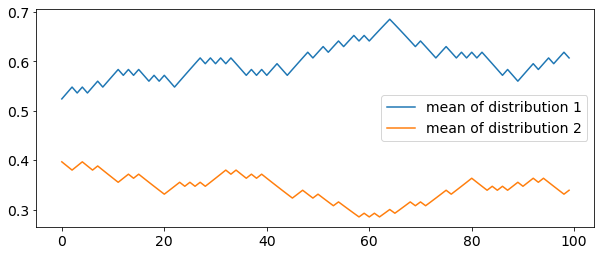

In [10]:
t = 10000
h = 100
t1 = 1000
t2 = 2000

f_t = f(t)
f_t1 = f_t[t1:t1+h]
f_t2 = f_t[t2:t2+h]

plt.figure(figsize=(10,4))
plt.plot(norm.cdf(f_t1, scale=np.sqrt(t1+h)), label='mean of distribution 1')
plt.plot(norm.cdf(f_t2, scale=np.sqrt(t2+h)), label='mean of distribution 2');
# plt.plot(np.array(s_t1).std(axis=1), label='std of distribution 1')
# plt.plot(np.array(s_t2).std(axis=1), label='std of distribution 2');
plt.legend();